<a href="https://www.kaggle.com/code/emres1k/emre-k-titanic-eda?scriptVersionId=164749389" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction
The sinking of Titanic is one of the most notorious shipwrecks in the history. In 1912, during her voyage the titanic sank after colliding with an iceberg, killing 1502 out of 224 passengers and crew.  

<font color = 'blue'>
Content:
    
1. [Load and Check Data](#1)
1. [Variable description](#2)
    * [Univariate Variable Analysis](#3)
        * [Categorical Variable](#4)
        * [Numerical Variable](#5)
1. [Basic Data Analysis](#6)
1. [Outlier Detection](#7)
1. [Missing Value](#8)
    * [Find Missing Value](#9)
    * [Fill Missing Value](#10)
1. [Visualization](#11)
    * [Correlation Between SibSp- Parch -- Age -- Fare -- Survived](#12)
    * [SipSp -- Survived](#13)
    * [Parch -- Survived](#14)
    * [Pclass -- Survived](#15)
    * [Age -- Survived](#16)
    * [Pclass -- Survived -- Age](#17)
    * [Embarked -- Sex -- Pclass -- Survived](#18)
    * [Embarked -- Sex -- Fare -- Survived](#19)
    * [Filling Missing: Age Feature](#20)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


<a id = "1"> </a>  
## 1. Load and Check Data:

In [2]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
test_PassengerId = test_df["PassengerId"]
gender_submission_df = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [3]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id = "2"> </a>  
## 2. Variable Description:
1. PassengerId: unique id number to each passenger
1. Survived:passenger survive(1) or died(0)
1. Pclass: passenger class
1. Name: name of the passenger
1. Sex: gender of the passenger
1. Age: age of the passenger
1. SibSp: number of siblings/spouses of the passenger
1. Parch: number of parents/children of the passenger
1. Ticket: ticket number
1. Fare: amount of money spent on ticket
1. Cabin: cabin category
1. Embarked: port where passenger embarked(C = Cherbourg, Q = Queenstown, S = Southampton)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<a id = "3"> </a>  
# Univariate Variable Analysis
* Categorical Variable Analysis: Surbibed, Sec, Pclass, Embarked, Cabin, Name, Sipsp nad Parch
* Numerical Variable Analysis: Age, PassengerId and Fare

<a id = "4"> </a>  
## Categorical Variable Analysis  


In [8]:
def bar_plot(variable):
    """
        input: variable ex: "Sex"
        output: bar plot & value count
    """
    # get feature
    var = train_df[variable]
    # count number of categorical variable(value/sample)
    var_value = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(var_value.index,var_value)
    plt.xticks(var_value.index,var_value.index.values)
    plt.ylabel("Frequency")
    plt.xlabel(variable)
    plt.show()
    print(var_value)
    """
    for survived: 
    var_value.index -> Index([0, 1], dtype='int64', name='Survived')
    var_value.index.values -> [0 1]
    """

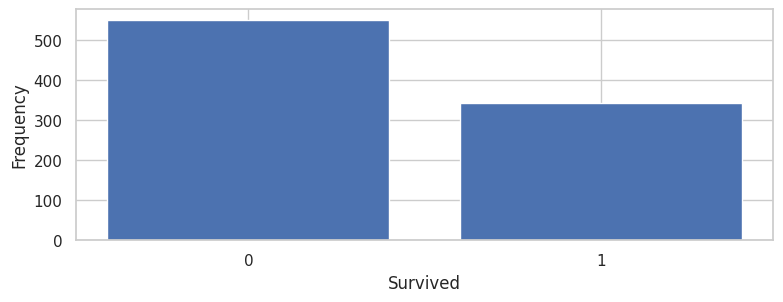

Survived
0    549
1    342
Name: count, dtype: int64


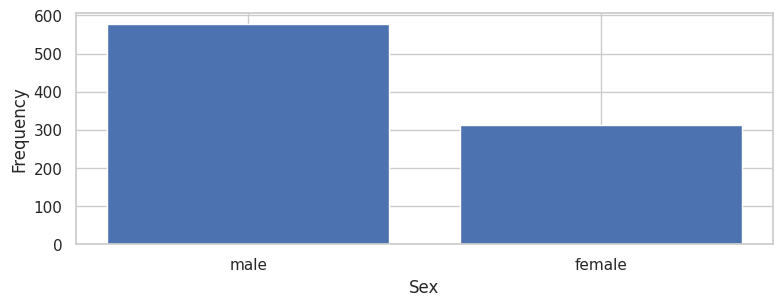

Sex
male      577
female    314
Name: count, dtype: int64


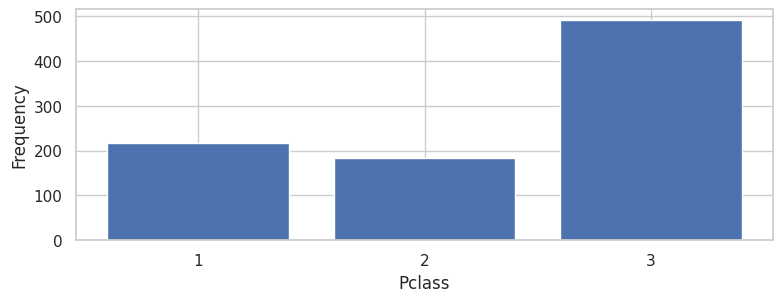

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


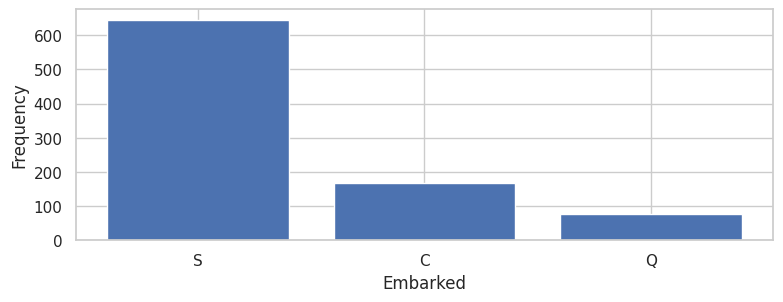

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


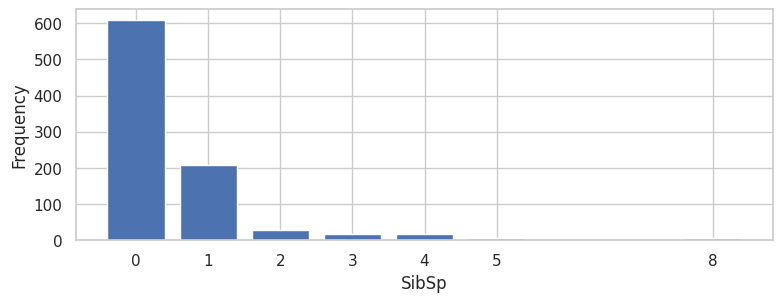

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


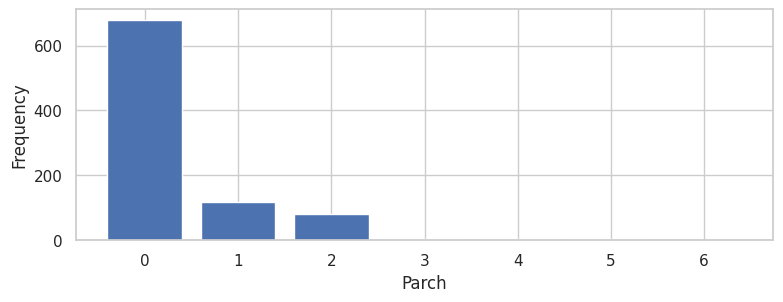

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [9]:
category1 = ["Survived","Sex","Pclass","Embarked","SibSp","Parch"]
for c in category1:    
    bar_plot(c)

In [10]:
category2 = ["Cabin","Name","Ticket"]
for c in category2:
    print(f"{train_df[c].value_counts}\n")

<bound method IndexOpsMixin.value_counts of 0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object>

<bound method IndexOpsMixin.value_counts of 0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object>

<bound method IndexOpsMixin.value_counts of 0             A/5 21171
1 

<a id = "5"> </a>  
## Numerical Variable Analysis  

In [11]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train_df[variable],bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title(f"{variable} distribution with hist")
    plt.show()

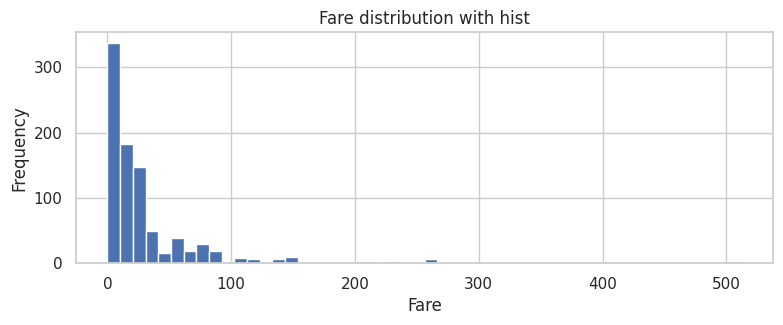

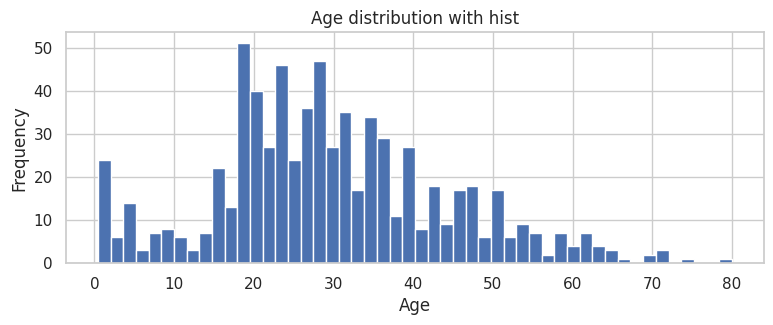

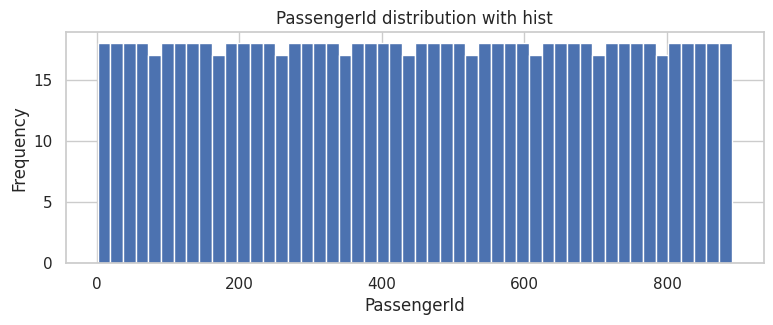

In [12]:
numeric_var = ["Fare", "Age" , "PassengerId"]
for n in numeric_var:
    plot_hist(n)

<a id = "6"> </a>  
# Basic Data Analysis
* Pclass - Survived
* Sex - Survived
* Sibsp - Survived
* Parch - Survived

In [13]:
# Pclass vs Survived
"""
train_df.groupby(["Pclass"], as_index = False)[["Pclass","Survived"]].mean()
train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean()
these are same
"""
print(train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).describe())
train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived",ascending = False)

  Pclass Survived                                             
            count      mean       std  min  25%  50%  75%  max
0      1    216.0  0.629630  0.484026  0.0  0.0  1.0  1.0  1.0
1      2    184.0  0.472826  0.500623  0.0  0.0  0.0  1.0  1.0
2      3    491.0  0.242363  0.428949  0.0  0.0  0.0  0.0  1.0


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [14]:
# Sex vs Survived
train_df[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [15]:
# Sibsp vs Survived
train_df[["SibSp","Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [16]:
# Parch vs Survived
train_df[["Parch","Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


<a id = "7"> </a>  
# Outlier Detection

In [17]:
def detect_outliers(df,features):
    outlier_indices = []
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd uartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR=Q3-Q1
        # Outlier step
        outlier_step = IQR*1.5
        # detect outlier and thier indices
        outlier_list_col = df[  (df[c]<Q1-outlier_step) | (df[c]>Q3+outlier_step)  ].index
        # store indices
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i,v in outlier_indices.items() if v>2 )
    print(multiple_outliers)
    return multiple_outliers

In [18]:
train_df.loc[detect_outliers(train_df,["Age","SibSp","Parch","Fare"])]

[27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [19]:
# drop outliers
train_df = train_df.drop(detect_outliers(train_df,["Age","SibSp","Parch","Fare"]),axis = 0).reset_index(drop=True)

[27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


<a id = "8"> </a>  
# Missing Value

In [20]:
train_df_len=len(train_df)
test_df_len = len(test_df)
train_df = pd.concat([train_df,test_df],axis=0).reset_index(drop = True)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a id = "9"> </a>  
## Find Missing Value

In [21]:
train_df.columns[train_df.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [22]:
train_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

<a id = "10"> </a>  
## Fill Missing Value
* Embarked has 2 missing values
* Fare has only 1

In [23]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


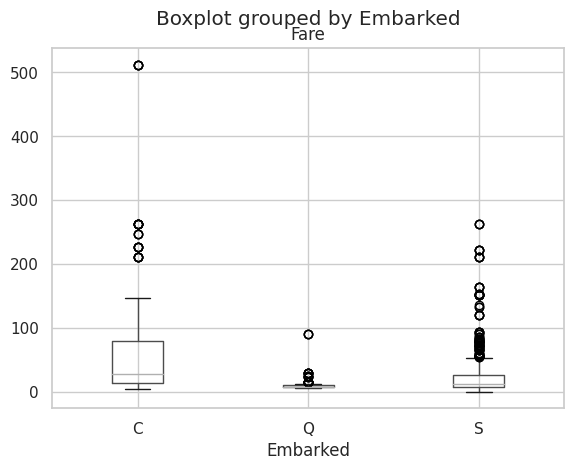

In [24]:
train_df.boxplot(column="Fare",by="Embarked")
plt.show()

In [25]:
train_df["Embarked"] = train_df["Embarked"].fillna("C")

In [26]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [27]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [28]:
fill_missing_fare=train_df[train_df["Pclass"] == 3]["Fare"].mean()


In [29]:
train_df["Fare"] = train_df["Fare"].fillna(fill_missing_fare)

In [30]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<a id = "11"> </a>  
# Visualization

<a id = "12"> </a>  
## Correlation Between SibSp -- Parch -- Age -- Fare -- Survived(#12)


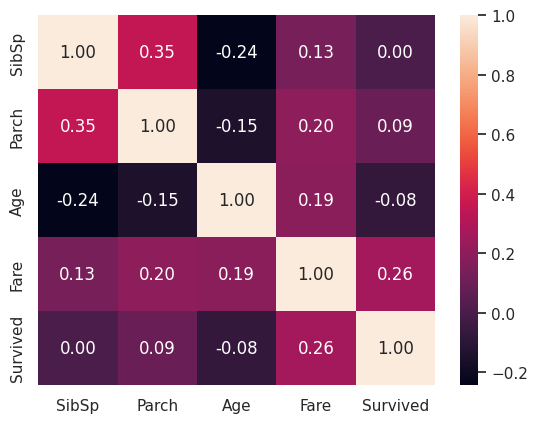

In [31]:
list1 = ["SibSp", "Parch",  "Age",  "Fare",  "Survived"]
sns.heatmap(train_df[list1].corr(),annot = True, fmt = ".2f")
plt.show()

Fare feature seems to pretty good have correlation with Survived feature (0.26)  
Parch feature seems to pretty good have correlation with SubSp feature (0.26)

<a id=13></a>
## SipSp -- Survived

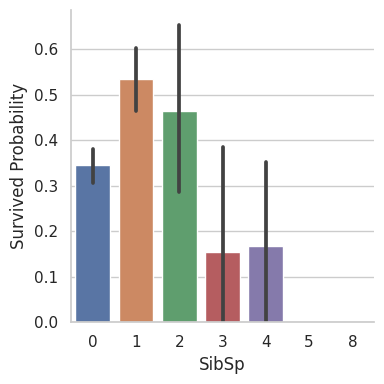

In [32]:
y = sns.catplot (x= "SibSp", y="Survived",data = train_df,kind = "bar",height=4, aspect=1)
y.set_ylabels("Survived Probability")
plt.show()

* Having a lot of SipSp have less chance to survive
* If SibSp less than 2, passenger has more chance to survive
* We can consider a new feature describing these categories

<a id=14></a>
## Parch -- Survived

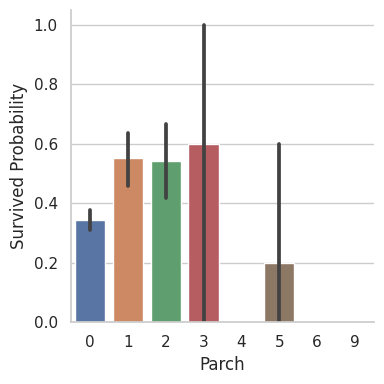

In [33]:
g = sns.catplot (x= "Parch", y="Survived",data = train_df,kind = "bar",height=4, aspect=1)
g.set_ylabels("Survived Probability")
plt.show()

* SibSp and Parch can be used for new feature extraction with th = 3
* Small families have more chance to survive. Passenger who has not family has less chance to survive
* There is a high std in survival of passenger with parch = 3. On the other hand, if group's parch value equals to 3, it means that the survival outcomes within this group are more varied. Some people in this group may have survived while others may not have survived 

<a id=15></a>
## Pclass -- Survived

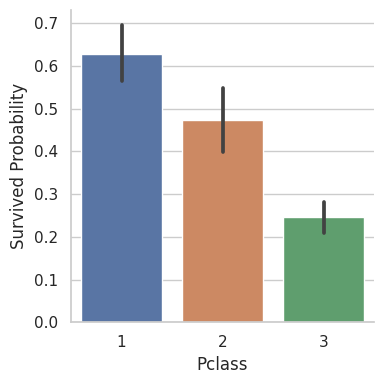

In [34]:
g = sns.catplot (x= "Pclass", y="Survived",data = train_df,kind = "bar",height=4, aspect=1)
g.set_ylabels("Survived Probability")
plt.show()

<a id=16></a>
## Age -- Survived

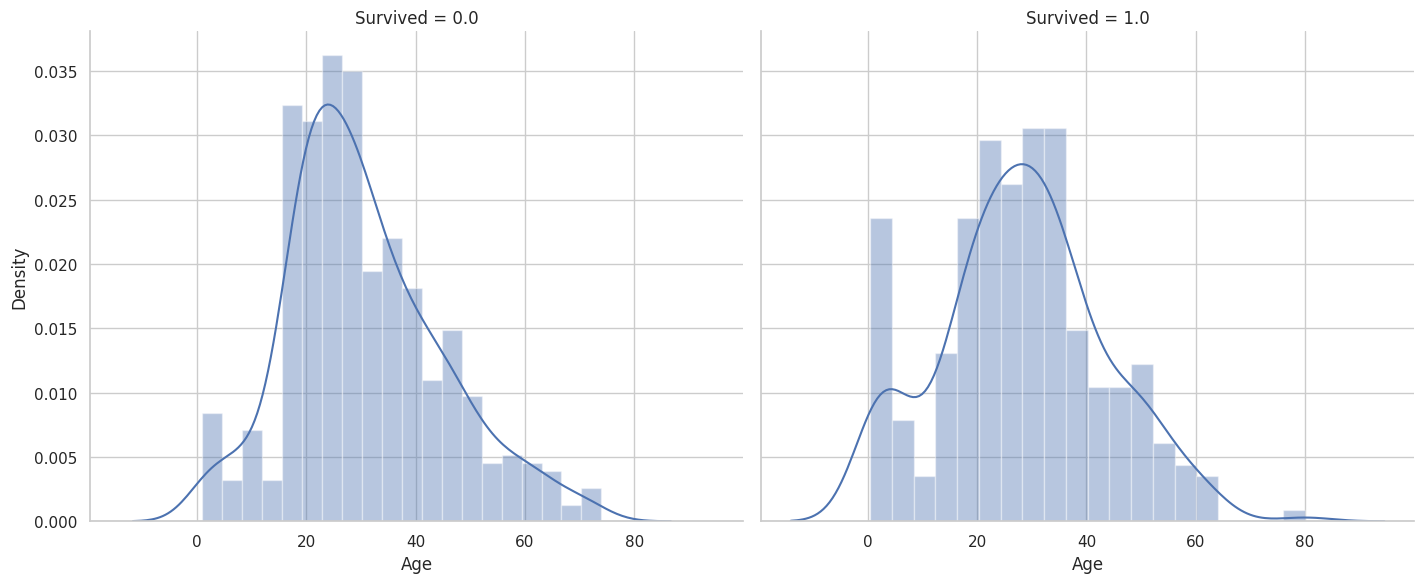

In [35]:
g = sns.FacetGrid(train_df, col="Survived", height=6, aspect=1.2) 
g.map(sns.distplot, "Age", bins=20)
plt.show()

* Toddlers have high survival rate.
* Oldest passengers(80) survived.
* Large number of 20 years old did not survive.
* Most passengers are in 15-35 age range.
* Use age feature in training.
* Use age distribution for missing value of age.

<a id=17> </a>
## Pclass -- Survived -- Age

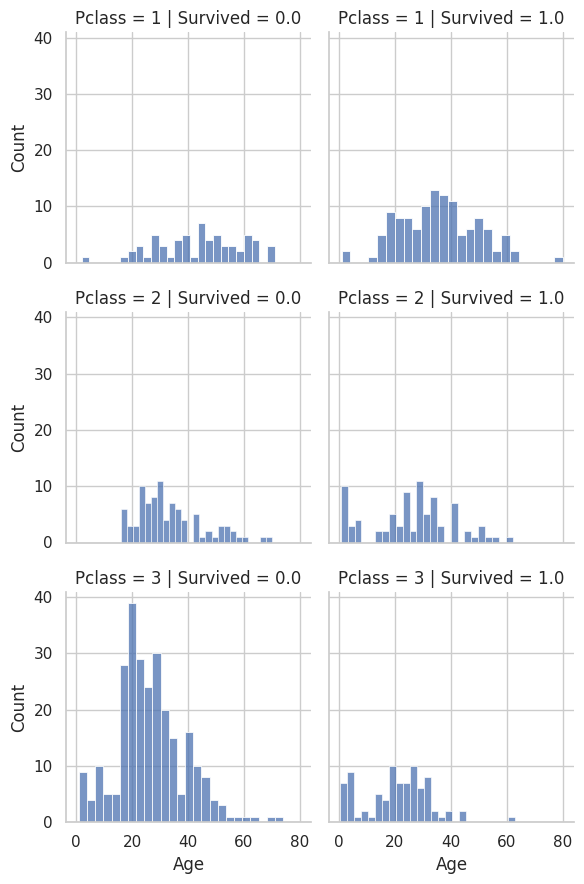

In [36]:
g = sns.FacetGrid(train_df, col="Survived", row = "Pclass", height=3, aspect=1) 
g.map(sns.histplot, "Age", bins=25)
plt.show()

* Pclass is important feature for modal training.

<a id=18> </a>
## Embarked -- Sex -- Pclass -- Survived

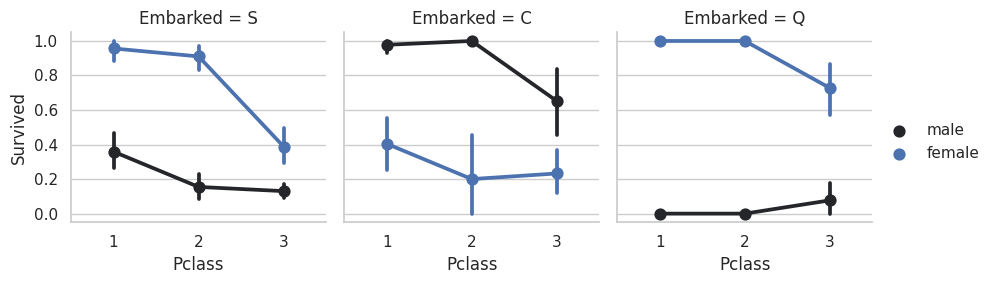

In [37]:
g = sns.FacetGrid(train_df, col="Embarked", height=3, aspect=1) 
g.map(sns.pointplot, "Pclass", "Survived", "Sex")
g.add_legend()
plt.show()

* Female passengers have much better survival rate than males.
* males have better survival rate in the port of C
* embarked and sex will be used in training.

<a id=19> </a>
## Embarked -- Sex -- Fare -- Survived

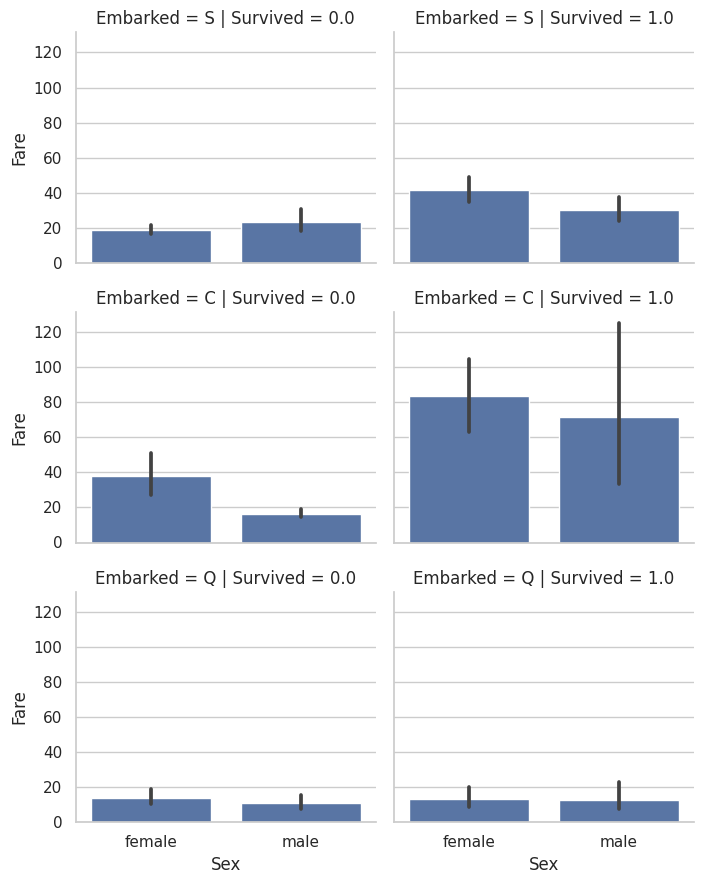

In [38]:
g = sns.FacetGrid(train_df, row="Embarked",col = "Survived", height=3, aspect=1.2) 
g.map(sns.barplot, "Sex", "Fare")
plt.show()

* Passengers who pay higher fare have better survival. Fare can be used as categorical for training.
* Passengers who embarked in the port of C, have much survival rate.

<a id="20"> </a>
## Filling Missing: Age Feature

In [39]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1289,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1291,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1294,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1297,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


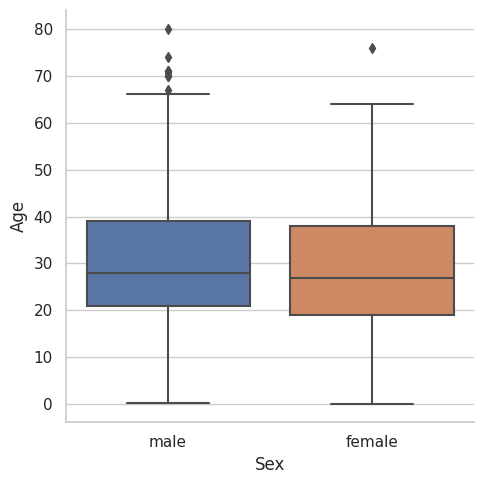

In [40]:
sns.catplot(x= "Sex", y="Age", data = train_df, kind = "box")
plt.show()

* Sex is not informative for age prediction, because age distribution seems to be same

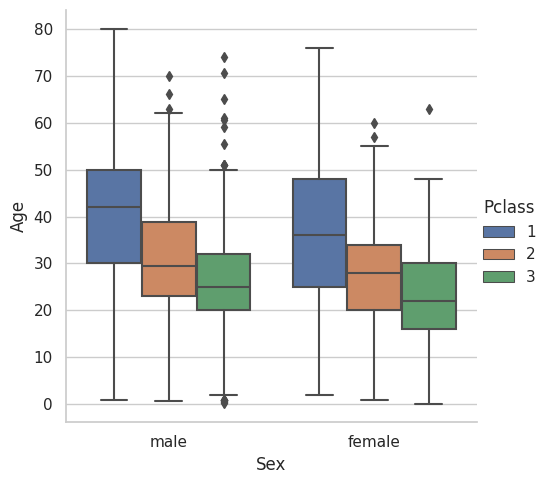

In [41]:
sns.catplot(x= "Sex", y="Age",hue = "Pclass" ,data = train_df, kind = "box")
plt.show()

* First class passenger are older than second, and second is older than third class

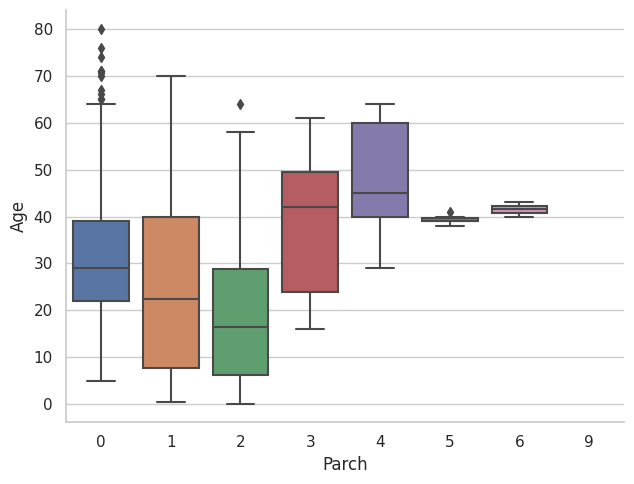

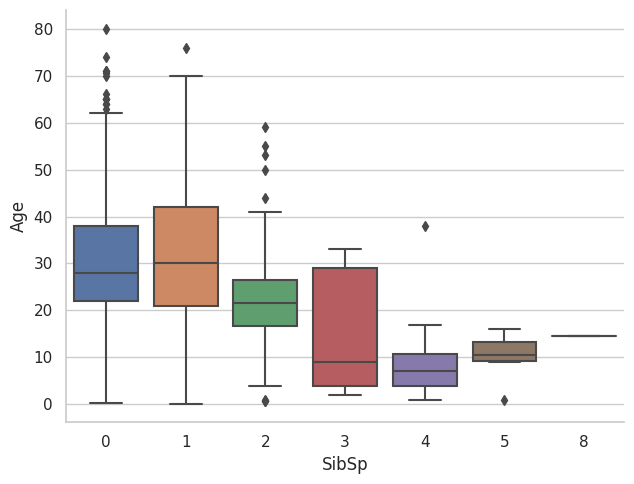

In [42]:
sns.catplot(x= "Parch", y="Age" ,data = train_df, kind = "box",aspect=1.3)
sns.catplot(x= "SibSp", y="Age" ,data = train_df, kind = "box",aspect=1.3)
plt.show()

In [43]:
# convert Sex variable string to float
train_df["Sex"] = [1 if i=="male" else 0 for i in train_df["Sex"]]

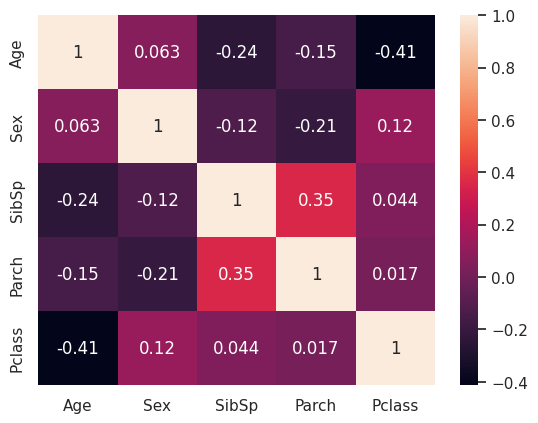

In [44]:
sns.heatmap(train_df[["Age","Sex","SibSp","Parch","Pclass"]].corr(),annot=True)
plt.show()

* Age is not crrelated with sex but it is sorrelated with parch, sibsp and pclass.

In [45]:
train_df["Pclass"] == train_df.iloc[45]["Pclass"]

0        True
1       False
2        True
3       False
4        True
        ...  
1294     True
1295    False
1296     True
1297     True
1298     True
Name: Pclass, Length: 1299, dtype: bool

In [46]:
train_df["Age"][ (train_df["Pclass"] == train_df.iloc[478]["Pclass"])]

0       22.0
2       26.0
4       35.0
5        NaN
7        2.0
        ... 
1293    28.0
1294     NaN
1296    38.5
1297     NaN
1298     NaN
Name: Age, Length: 702, dtype: float64

In [47]:
train_df["Age"][ (train_df["Pclass"] == train_df.iloc[478]["Pclass"])].median()

24.0

In [48]:
# the list of index numbers which their Age value is NaN
index_nan_age = list(train_df["Age"][train_df["Age"].isnull()].index)

for i in index_nan_age:
    age_pred = train_df["Age"][ (train_df["SibSp"]  == train_df.iloc[i]["SibSp"] ) &
                                (train_df["Parch"]  == train_df.iloc[i]["Parch"] ) &
                                (train_df["Pclass"] == train_df.iloc[i]["Pclass"]) ].median
age_pred    

<bound method Series.median of 10       4.00
64        NaN
126       NaN
169      1.00
172     18.00
184     40.00
246     29.00
274     35.00
322     31.00
341      3.00
345     15.00
416     28.00
417     18.00
482      9.00
525     17.00
541     33.00
588     36.00
609     34.00
615     20.00
650     32.00
702       NaN
739     16.00
791     30.00
843      9.00
859      4.00
885     22.00
961      6.00
985     16.00
998      1.00
1042     7.00
1046    26.00
1073    11.50
1144     1.00
1162     0.75
1164     9.00
1165     2.00
1214    19.00
1225      NaN
1290     3.00
1298      NaN
Name: Age, dtype: float64>

In [49]:
# the list of index numbers which their Age value is NaN
index_nan_age = list(train_df["Age"][train_df["Age"].isnull()].index)

for i in index_nan_age:
    age_pred = train_df["Age"][ (train_df["SibSp"]  == train_df.iloc[i]["SibSp"] ) &
                                (train_df["Parch"]  == train_df.iloc[i]["Parch"] ) &
                                (train_df["Pclass"] == train_df.iloc[i]["Pclass"]) ].median()
    age_med = train_df["Age"].median()
    if not np.isnan(age_pred):
        train_df["Age"].iloc[i] = age_pred
    else:
        train_df["Age"].iloc[i] = age_med

In [50]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
